In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pylab as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

import math
import sys
%matplotlib inline
sns.set()

In [2]:
pd.set_option('display.max_rows', 1100)
pd.set_option('display.max_columns', 1100)


In [3]:
justdata = pd.read_csv("../csv/event_jp.csv",encoding="Shift-JIS")

event = pd.read_csv("../csv/event_impact.csv",encoding="Shift-JIS")




In [4]:
justdata

,date,precipitation,sub,event,pre_impact,impact
0,2017/7/1,0.0,0.000000,0,0.0,0.0
1,2017/7/2,0.5,0.000000,0,0.0,0.0
2,2017/7/3,0.0,0.000000,0,0.0,0.0
3,2017/7/4,72.0,0.000000,雨,0.0,0.0
4,2017/7/5,9.5,0.000000,0,0.0,0.0
5,2017/7/6,0.0,0.000000,0,0.0,0.0
6,2017/7/7,0.0,0.000000,0,0.0,0.0
7,2017/7/8,0.0,0.000000,0,0.0,0.0
8,2017/7/9,0.0,0.000000,0,0.0,0.0
9,2017/7/10,0.0,0.000000,0,0.0,0.0


In [25]:
event

,date,impact
0,2017-07-01,0.00
1,2017-07-02,0.00
2,2017-07-03,0.00
3,2017-07-04,-3.59
4,2017-07-05,0.00
5,2017-07-06,0.00
6,2017-07-07,0.00
7,2017-07-08,0.00
8,2017-07-09,0.00
9,2017-07-10,0.00


(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

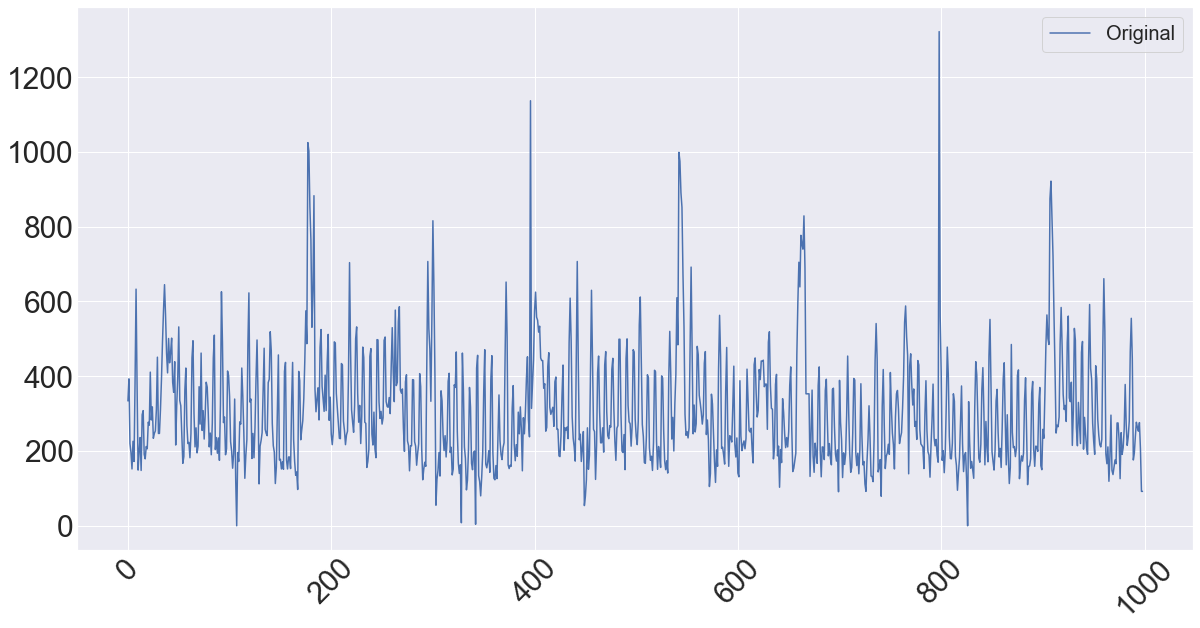

In [36]:
import datetime

fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(justdata["CustNum"], label='Original')

# sxmin='2018-06-01'
# sxmax='2020-03-12'

# xmin = datetime.datetime.strptime(sxmin, '%Y-%m-%d')
# xmax = datetime.datetime.strptime(sxmax, '%Y-%m-%d')
# plt.xlim([xmin,xmax])

plt.tick_params(length=0)
plt.legend(fontsize=20,ncol=2)
plt.tick_params(labelsize=30)
plt.xticks(rotation=45)
# fig.savefig("lgbm_predict.png",bbox_inches="tight")